In [1]:
import os
import pandas as pd
import numpy as np

# Define the directory where the CSV files are located
data_dir = r'C:\Users\user\Documents\Rally\Telemetry\data\Oberehe23_WP2'

# List of CSV files
csv_files = [
    'Accelerometer.csv',
    'Gyroscope.csv',
    'Location.csv',
    'Magnetometer.csv'
]

# Target path for the combined and resampled data
combined_output_path = r'C:\Users\user\Documents\Rally\Telemetry\data preperation\combined_data.csv'
# Target path for the combined and resampled data
prepared_output_path = r'C:\Users\user\Documents\Rally\Telemetry\data preperation\prepared_data.csv'

# Sampling rate for resampling
target_sampling_rate = 10  # 10 Hz

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over the CSV files and process them
for csv_file in csv_files:
    input_path = os.path.join(data_dir, csv_file)
    
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(input_path)
    
    # Set the time as the index (assuming "Time (s)" is the time column)
    df['Time (s)'] = pd.to_datetime(df['Time (s)'], unit='s')
    df.set_index('Time (s)', inplace=True)
    
    # Resample and linearly interpolate
    df_resampled = df.resample(f'{1/target_sampling_rate}S').mean().interpolate(method='linear')
    
    # Append the resampled DataFrame to the list
    dfs.append(df_resampled)

# Combine the resampled DataFrames into one DataFrame
combined_df = pd.concat(dfs, axis=1)
# Remove rows with NaN values from the DataFrame
combined_df = combined_df.dropna()

# Save the combined DataFrame to a CSV file
combined_df.to_csv(combined_output_path)

#############################################################################

combined_df_inter=combined_df
# Berechnen Sie die Mittelwerte der Beschleunigungsspalten
combined_df_inter['Acceleration x (m/s^2)'] = combined_df['Acceleration x (m/s^2)'] - combined_df['Acceleration x (m/s^2)'].mean()
combined_df_inter['Acceleration y (m/s^2)'] = combined_df['Acceleration y (m/s^2)'] - combined_df['Acceleration y (m/s^2)'].mean()
combined_df_inter['Acceleration z (m/s^2)'] = combined_df['Acceleration z (m/s^2)'] - combined_df['Acceleration z (m/s^2)'].mean()

# Berechnen Sie die Spalte atan(Magnetic field y / Magnetic field z)
# Define the conversion function
def convert_to_positive_azimuth(azimuth_degrees):
    if azimuth_degrees < 0:
        azimuth_degrees += 360.0
    elif azimuth_degrees > 360.0:
        azimuth_degrees -= 360.0
    return azimuth_degrees


combined_df_inter["B"] = np.sqrt(combined_df["Magnetic field x (µT)"]**2 + combined_df["Magnetic field y (µT)"]**2 + combined_df["Magnetic field z (µT)"]**2)
combined_df_inter["Magnetic_Field_x_normalized"] = combined_df["Magnetic field x (µT)"] / combined_df_inter["B"]
combined_df_inter["Magnetic_Field_y_normalized"] = combined_df["Magnetic field y (µT)"] / combined_df_inter["B"]
combined_df_inter["Magnetic_Field_z_normalized"] = combined_df["Magnetic field z (µT)"] / combined_df_inter["B"]
combined_df_inter["inclination"] = np.arctan2(combined_df_inter["Magnetic_Field_z_normalized"], np.sqrt(combined_df_inter["Magnetic_Field_x_normalized"]**2 + combined_df_inter["Magnetic_Field_y_normalized"]**2))
combined_df_inter["azimuth"] = np.arctan2(combined_df_inter["Magnetic_Field_y_normalized"], combined_df_inter["Magnetic_Field_x_normalized"])
combined_df_inter["inclination_degrees"] = combined_df_inter["inclination"] * (180.0 / np.pi)
combined_df_inter["azimuth_degrees"] = combined_df_inter["azimuth"] * (360.0 / np.pi)+90
# Apply the conversion function to the 'azimuth' column
combined_df_inter['Mag Direction (°)'] = combined_df_inter["azimuth_degrees"].apply(convert_to_positive_azimuth)
# Die gewünschten Spalten auswählen
prepared_df = combined_df_inter[[ 
                      'Acceleration x (m/s^2)', 
                      'Acceleration y (m/s^2)', 
                      'Acceleration z (m/s^2)', 
                      'Gyroscope x (rad/s)', 
                      'Gyroscope y (rad/s)', 
                      'Gyroscope z (rad/s)', 
                      'Latitude (°)', 
                      'Longitude (°)', 
                      'Height (m)', 
                      'Velocity (m/s)', 
                      'Direction (°)', 
                      'Mag Direction (°)']]

# Umbenennen der Spalten
prepared_df.columns = [ 
                      'Acceleration x (m/s^2)', 
                      'Acceleration y (m/s^2)', 
                      'Acceleration z (m/s^2)', 
                      'Gyroscope x (rad/s)', 
                      'Gyroscope y (rad/s)', 
                      'Gyroscope z (rad/s)', 
                      'Latitude (°)', 
                      'Longitude (°)', 
                      'Height (m)', 
                      'Velocity (m/s)', 
                      'Direction (°)', 
                      'Mag Direction (°)']


# Save the combined DataFrame to a CSV file
prepared_df.to_csv(prepared_output_path)

print("Resampling and combining completed.")


Resampling and combining completed.


In [2]:
prepared_df.describe()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Mag Direction (°)
count,3.071000e+03,3.071000e+03,3.071000e+03,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000
mean,-7.403897e-17,3.701948e-17,-2.591364e-16,-0.003192,-0.002156,-0.003882,50.249669,6.628099,471.006532,9.319433,155.842495,126.392535
std,2.256984e+00,2.329485e+00,1.122428e+00,0.108278,0.085256,0.183571,0.004374,0.004204,17.856955,11.669849,100.544404,103.463864
min,-9.552857e+00,-9.718240e+00,-5.387395e+00,-1.606328,-0.785679,-0.973304,50.238475,6.625331,411.400023,0.000000,0.200000,0.076202
25%,-8.436781e-01,-1.393868e+00,-3.994120e-01,-0.008045,-0.008082,-0.024453,50.246211,6.625735,472.412832,0.000000,67.970003,36.301530
50%,8.847387e-02,5.088296e-01,-8.410002e-02,-0.000999,-0.000143,-0.000153,50.252424,6.626245,477.287137,1.885000,134.859994,121.379617
75%,3.249371e-01,1.279669e+00,5.969824e-01,0.005864,0.011140,0.024920,50.252785,6.628272,480.246044,18.963000,237.104994,129.873977
max,1.019706e+01,7.447031e+00,5.318777e+00,3.008839,0.975545,4.183558,50.252796,6.643518,493.886609,37.820000,357.299988,359.989069


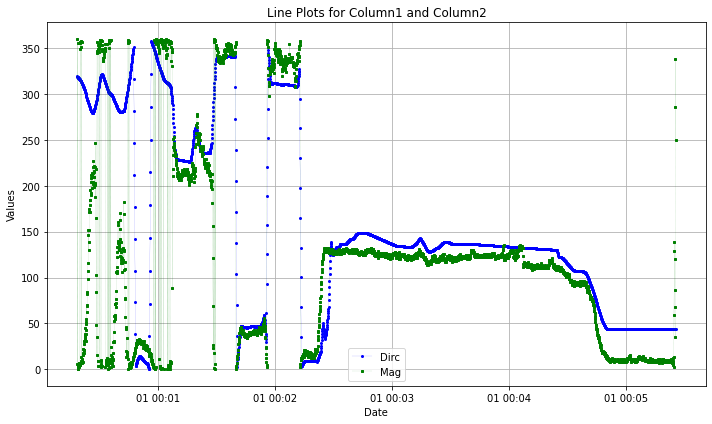

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Create two line plots
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot 'Column1'
plt.plot(prepared_df.index, prepared_df['Direction (°)'], label='Dirc', marker='o', linestyle='-', color='blue', linewidth=0.1, markersize=2)

# Plot 'Column2'
plt.plot(prepared_df.index, prepared_df['Mag Direction (°)'], label='Mag', marker='s', linestyle='--', color='green', linewidth=0.1, markersize=2)

# Plot 'Column3'
#plt.plot(prepared_df.index, combined_df_inter["azimuth_degrees"], label='Azi', marker='x', linestyle='--', color='red')

# Customize the plot
plt.title('Line Plots for Column1 and Column2')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
combined_df_inter["azimuth_degrees"]

Time (s)
1970-01-01 00:00:18.700    359.958407
1970-01-01 00:00:18.800    366.337750
1970-01-01 00:00:18.900    355.957270
1970-01-01 00:00:19.000    360.111119
1970-01-01 00:00:19.100    360.356043
                              ...    
1970-01-01 00:05:25.300    427.920132
1970-01-01 00:05:25.400    395.768000
1970-01-01 00:05:25.500    337.580698
1970-01-01 00:05:25.600    285.984166
1970-01-01 00:05:25.700    249.475347
Freq: 100L, Name: azimuth_degrees, Length: 3071, dtype: float64